In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn import ensemble
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV


data = pd.read_csv("dataset.csv")

x = data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']]
y = data[["y"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()

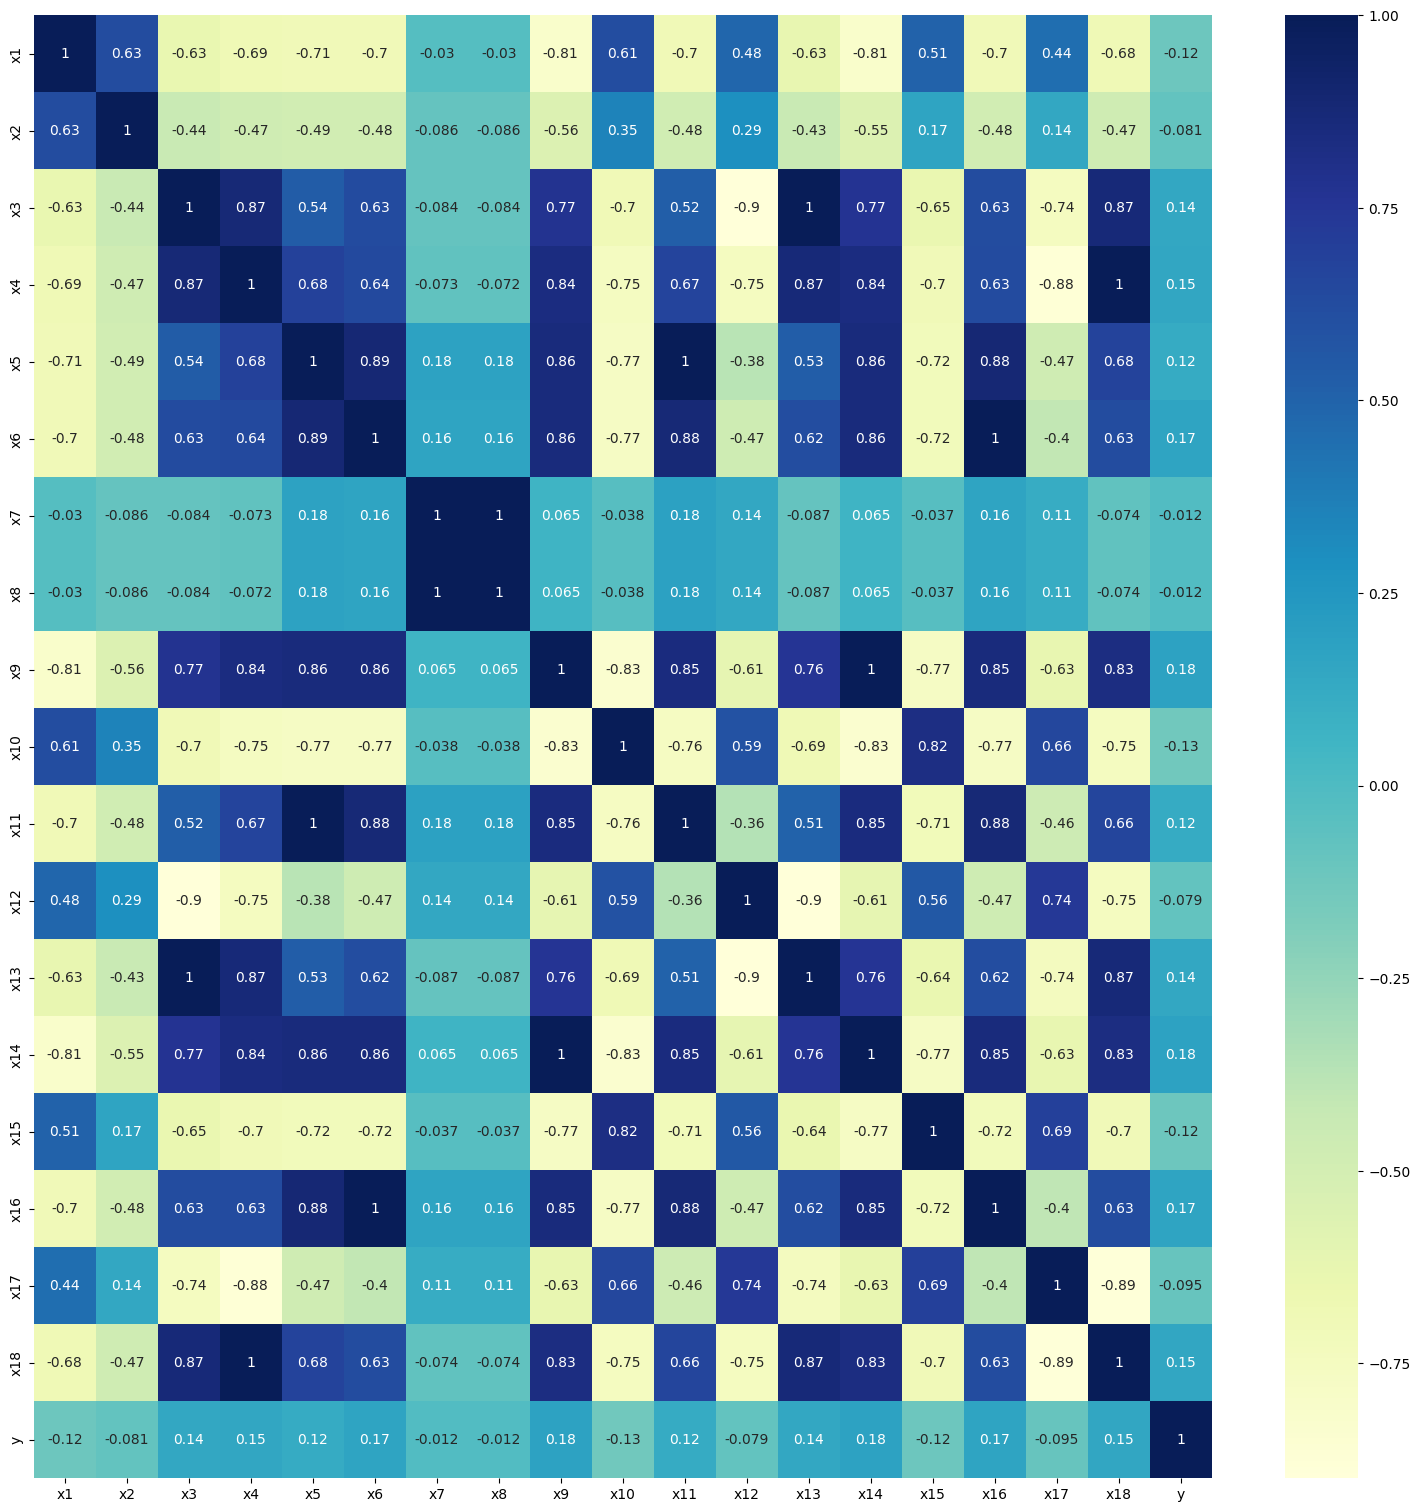

<Figure size 640x480 with 0 Axes>

In [2]:
corr_matrix = data.corr()
plt.figure(figsize=(19, 19))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [3]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x, y.values.ravel())


RandomForestRegressor(random_state=42)

In [12]:
# Get the feature importances from the trained model
importances = rf.feature_importances_


In [13]:
# Sort the importances in descending order
indices = np.argsort(importances)[::-1]


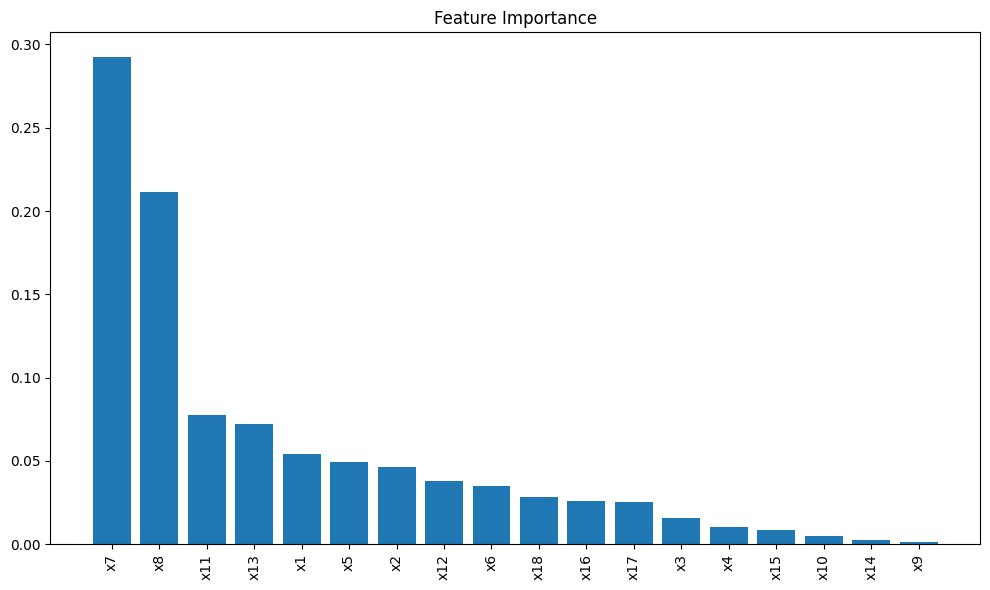

In [14]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [15]:
x_rf = data[["x1", "x2", "x5", "x6", "x7", "x8", "x11", "x12", "x13"]]
x_train, x_test, y_train, y_test = train_test_split(x_rf, y, test_size=0.2, random_state=42)
y_train = y_train.values.ravel()

In [17]:
rf = RandomForestRegressor(random_state=0)
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)] 
max_features = ['sqrt'] 
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] 
min_samples_split = [2, 6, 10] 
min_samples_leaf = [1, 3, 4] 
bootstrap = [True, False] 

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf,

param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

rf_random.fit(x_train, y_train)

# this prints the contents of the parameters in the random grid
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Random grid:  {'n_estimators': [1, 12, 23, 34, 45, 56, 67, 78, 89, 100], 'max_features': ['sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 78, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}  



In [20]:
params = {
    'n_estimators': 78,
    'min_samples_split': 6,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'max_depth': 30,
    'bootstrap': False
}

rf = RandomForestRegressor(**params)
rf.fit(x_train,y_train)
rf_prediction = rf.predict(x_test)

mse = mean_squared_error(y_test, rf_prediction)
print("Mean squared error (MSE):" ,mse)

rmse = mse**.5
print("Root mean squared error(RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test, rf_prediction)
percentage_error = mape * 100
print("Mean Absolute Percentage Error (MAPE):", percentage_error)

r2 = r2_score(y_test, rf_prediction)
print("R^2 Score:", r2)

mae = mean_absolute_error(y_test, rf_prediction)
print("MAE:", mae)

Mean squared error (MSE): 21552.270670153437
Root mean squared error(RMSE): 146.80691628855038
Mean Absolute Percentage Error (MAPE): 3.2605337342860513e+18
R^2 Score: 0.9824856228307526
MAE: 53.20165898648861


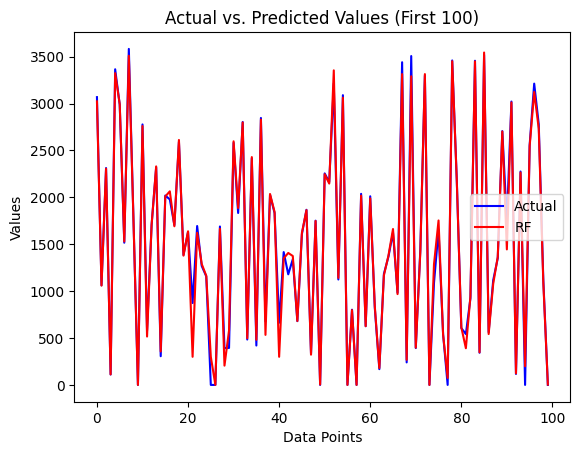

In [22]:
x = np.arange(100)

# Create a line plot for actual values
plt.plot(x, y_test[:100], color='blue', label='Actual')

# Create a line plot for predicted values
plt.plot(x, rf_prediction[:100], color='red', label='RF')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (First 100)')

plt.legend()
plt.show()

In [28]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [300, 400, 500],
    'max_depth': [5, 10, 15],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Define the XGBRegressor model
model = XGBRegressor()

# Perform random search
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5, scoring='r2', random_state=42)
random_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", random_search.best_params_)

Best Parameters:  {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 15, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [33]:
best_params = {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 15, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

# Create a new instance of XGBRegressor with the best parameters
xgb_r = XGBRegressor(**best_params)
xgb_r.fit(x_train, y_train)
  
# Predict the model
xgb_pred = xgb_r.predict(x_test)
  

mse = mean_squared_error(y_test, xgb_pred)
print("Mean squared error (MSE):" ,mse)

rmse = mse**.5
print("Root mean squared error(RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test, xgb_pred)
percentage_error = mape * 100
print("Mean Absolute Percentage Error (MAPE):", percentage_error)

r2 = r2_score(y_test, xgb_pred)
print("R^2 Score:", r2)

mae = mean_absolute_error(y_test, xgb_pred)
print("MAE:", mae)

Mean squared error (MSE): 23808.406413431952
Root mean squared error(RMSE): 154.2997291424452
Mean Absolute Percentage Error (MAPE): 3.282559483397279e+18
R^2 Score: 0.9806521820319822
MAE: 59.17680431614512


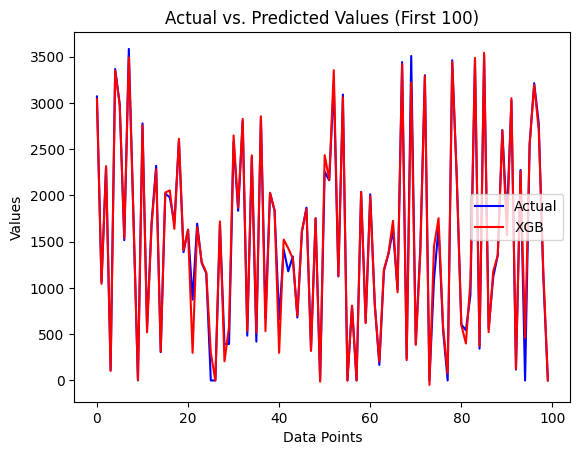

In [34]:
x = np.arange(100)

# Create a line plot for actual values
plt.plot(x, y_test[:100], color='blue', label='Actual')

# Create a line plot for predicted values
plt.plot(x, xgb_pred[:100], color='red', label='XGB')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (First 100)')

plt.legend()
plt.show()

In [36]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [5, 7, 10],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}
model = ensemble.GradientBoostingRegressor()
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
random_search.fit(x_train, y_train)
print("Best Parameters: ", random_search.best_params_)

Best Parameters:  {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 7, 'learning_rate': 0.1}


In [40]:
params = {'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 7, 'learning_rate': 0.1}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)
grad_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, grad_pred)
print("Mean squared error (MSE):" ,mse)

rmse = mse**.5
print("Root mean squared error(RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test, grad_pred)
percentage_error = mape * 100
print("Mean Absolute Percentage Error (MAPE):", percentage_error)

r2 = r2_score(y_test, grad_pred)
print("R^2 Score:", r2)

mae = mean_absolute_error(y_test, grad_pred)
print("MAE:", mae)

Mean squared error (MSE): 31541.937908447835
Root mean squared error(RMSE): 177.60050086767163
Mean Absolute Percentage Error (MAPE): 4.744321745829378e+18
R^2 Score: 0.9743675547865785
MAE: 91.85003272940845


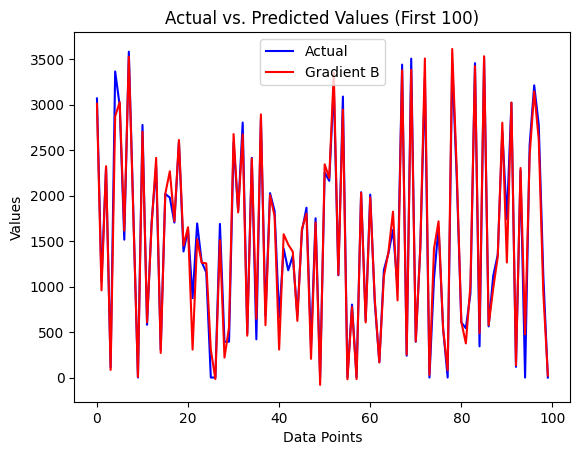

In [41]:
x = np.arange(100)

# Create a line plot for actual values
plt.plot(x, y_test[:100], color='blue', label='Actual')

# Create a line plot for predicted values
plt.plot(x, grad_pred[:100], color='red', label='Gradient B')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (First 100)')

plt.legend()
plt.show()

In [42]:
param_dist = {
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),

}
random_search = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    n_jobs=-1
)

random_search.fit(x_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Best Score: 0.734074373950731


In [43]:
params = {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}

regressor = DecisionTreeRegressor(**params)
regressor.fit(x_train, y_train)
dt_pred = regressor.predict(x_test)

mse = mean_squared_error(y_test, dt_pred)
print("Mean squared error (MSE):" ,mse)

rmse = mse**.5
print("Root mean squared error(RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test, dt_pred)
percentage_error = mape * 100
print("Mean Absolute Percentage Error (MAPE):", percentage_error)

r2 = r2_score(y_test, dt_pred)
print("R^2 Score:", r2)

mae = mean_absolute_error(y_test, dt_pred)
print("MAE:", mae)

Mean squared error (MSE): 336914.71316307166
Root mean squared error(RMSE): 580.4435486445444
Mean Absolute Percentage Error (MAPE): 2.066127926924188e+19
R^2 Score: 0.7262074400179743
MAE: 372.8470685169324


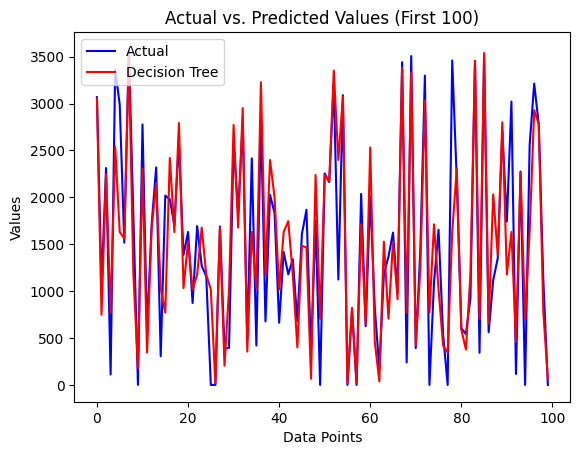

In [45]:
x = np.arange(100)

# Create a line plot for actual values
plt.plot(x, y_test[:100], color='blue', label='Actual')

# Create a line plot for predicted values
plt.plot(x, dt_pred[:100], color='red', label='Decision Tree')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (First 100)')

plt.legend()
plt.show()

In [48]:
mlp = MLPRegressor(hidden_layer_sizes=100, activation='relu', solver='lbfgs', random_state=35, max_iter=5000)
# Train the MLPRegressor
mlp.fit(x_train, y_train)


# Predict on the test set
mlp_pred = mlp.predict(x_test)
# Evaluate the model

mse = mean_squared_error(y_test, mlp_pred)
print("Mean squared error (MSE):" ,mse)

rmse = mse**.5
print("Root mean squared error(RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test, mlp_pred)
percentage_error = mape * 100
print("Mean Absolute Percentage Error (MAPE):", percentage_error)

r2 = r2_score(y_test, mlp_pred)
print("R^2 Score:", r2)

mae = mean_absolute_error(y_test, mlp_pred)
print("MAE:", mae)

Mean squared error (MSE): 492209.00649346353
Root mean squared error(RMSE): 701.5760874584192
Mean Absolute Percentage Error (MAPE): 2.735568016052086e+19
R^2 Score: 0.6000080772108414
MAE: 531.323511491303


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


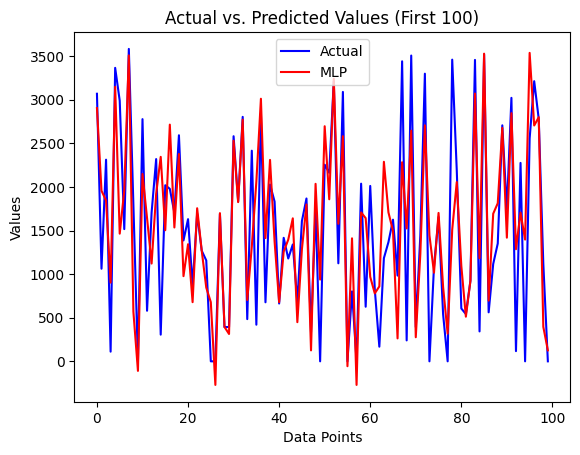

In [50]:
x = np.arange(100)

# Create a line plot for actual values
plt.plot(x, y_test[:100], color='blue', label='Actual')

# Create a line plot for predicted values
plt.plot(x, mlp_pred[:100], color='red', label='MLP')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values (First 100)')

plt.legend()
plt.show()